---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [2]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [ ]:
df['Date'] = ['December 1', 'January 1', 'mid-May']#Se añade al dataframe una nueva columna "Date" y las filas 'December 1', 'January 1', 'mid-May'
df

In [ ]:
df['Delivered'] = True #Se añade al dataframe una nueva columna "Delivered" con filas con valores booleanos "True"
df

In [ ]:
df['Feedback'] = ['Positive', None, 'Negative'] #Se añade al dataframe una nueva columna "Feedback" con filas de diferentes índoles, como strings y valores None
df

In [ ]:
adf = df.reset_index() #Se crea un nuevo dataframe con índice reiniciado
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'}) #Al no conocer el valor para la key 1 de la columna Date pandas agrega un missing value (NaN)

In [3]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [ ]:
pd.merge?

In [4]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)#Se unen los 2 dataframes por medio de la union de las keys

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [5]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)#Se unen los 2 dataframe por medio de la intersección de las keys

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [ ]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)#Se usan las keys del dataframe izquierdo

In [ ]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)#Se usan las keys del dataframe derecho

In [ ]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [6]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

# Idiomatic Pandas: Making Code Pandorable

In [ ]:
import pandas as pd
df = pd.read_csv('census.csv')
df

In [ ]:
(df.where(df['SUMLEV']==50)#Código escrito de una forma mas "Pandorable"
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

In [ ]:
df = df[df['SUMLEV']==50] #Código escrito de una forma más estándar
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})


In [ ]:
df.apply(min_max, axis=1)#.apply aplica una función a lo largo de una columna o fila

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data) #Se agrega la columna max con el valor maximo de la variable data antes definida
    row['min'] = np.min(data) #Se agrega la columna min con el valor minimo de la variable data antes definida
    return row
df.apply(min_max, axis=1)

In [ ]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

# Group by

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50] #Actualizamos el dataframe con sólo aquellos que cumplen la condición qué  'SUMLEV' sea 50.
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [3]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP']) #Se calcula el promedio de población los condados de cada estado a partir de la columna CENSUS2010POP  
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964

Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state S

Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyomi

Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia

Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average populatio

Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average po

Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma hav

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virg

Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an 

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population o

Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average

Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state S

Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyomi

Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an a

Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of

Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average populati

Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Islan

Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state Wes

Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an aver

Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average populatio

Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population 

Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma hav

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virg

Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an a

Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population o

Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average popul

Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state S

Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alab

Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
5.43 s ± 331 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average

Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 24

Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state S

Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virg

Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average popula

Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average popul

Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizon

Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average populatio

Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an 

Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolin

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have 

Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average popula

Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population 

Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska hav

Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an a

Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average popul

Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia

Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population o

In [11]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [12]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [20]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [22]:
#Nos arroja un resumen del promedio de la población por estado basado en la columna CENSUS2010POP 
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}) #agg permite aplicar una función a la columna o las columnas deseadas


,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [23]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [32]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

#Usar lo siguiente ya que el uso de un dict en una Serie para la agregación está en desuso y se eliminará en una versión futura

#(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
#    .agg( avg = np.average, sum = np.sum))

C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [38]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [39]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


# Scales

In [50]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [49]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [51]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

ValueError: Got an unexpected argument: categories

In [52]:
grades > 'C'

NameError: name 'grades' is not defined

In [57]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [63]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [64]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [67]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [73]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [74]:
import pandas as pd
import numpy as np

### Timestamp

In [81]:
pd.Timestamp('5/20/2020 6:18PM')

Timestamp('2020-05-20 18:18:00')

### Period

In [78]:
pd.Period('1/2020')

Period('2020-01', 'M')

In [86]:
pd.Period('1/23/2022')

Period('2022-01-23', 'D')

### DatetimeIndex

In [87]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [88]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [89]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [90]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [92]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,66,80
"Aug 29, 2014",47,15
2015-06-26,73,41
7/12/16,65,87


In [93]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,66,80
2014-08-29,47,15
2015-06-26,73,41
2016-07-12,65,87


In [94]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [97]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [98]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [125]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [126]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,106,126
2016-10-16,111,128
2016-10-30,111,127
2016-11-13,114,124
2016-11-27,123,128
2016-12-11,120,118
2016-12-25,125,117
2017-01-08,123,127
2017-01-22,120,126


In [127]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [128]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,5.0,2.0
2016-10-30,0.0,-1.0
2016-11-13,3.0,-3.0
2016-11-27,9.0,4.0
2016-12-11,-3.0,-10.0
2016-12-25,5.0,-1.0
2017-01-08,-2.0,10.0
2017-01-22,-3.0,-1.0


In [129]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,109.333333,127.0
2016-11-30,118.500000,126.0
2016-12-31,122.500000,117.5
2017-01-31,121.500000,126.5


In [130]:
df['2017']

,Count 1,Count 2
2017-01-08,123,127
2017-01-22,120,126


In [131]:
df['2016-12']

,Count 1,Count 2
2016-12-11,120,118
2016-12-25,125,117


In [132]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,120,118
2016-12-25,125,117
2017-01-08,123,127
2017-01-22,120,126


In [133]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,106,126
2016-10-09,106,126
2016-10-16,111,128
2016-10-23,111,128
2016-10-30,111,127
2016-11-06,111,127
2016-11-13,114,124
2016-11-20,114,124
2016-11-27,123,128
2016-12-04,123,128


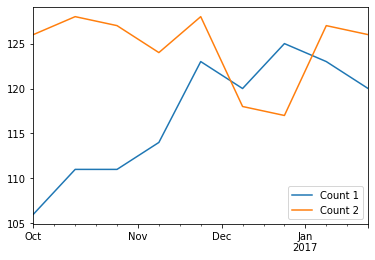

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()

EJERCICIOS VARIOS (VIDEOS)

Here are two DataFrames, products and invoices. The product DataFrame has an identifier and a sticker price. The invoices DataFrame lists the people, product identifiers, and quantity. Assuming that we want to generate totals, how do we join these two DataFrames together so that we have one which lists all of the information we need?

In [ ]:
answer = pd.merge(products, invoices, left_index=True, right_on='Product ID')

Suppose we are working on a DataFrame that holds information on our equipment for an upcoming backpacking trip.

Can you use method chaining to modify the DataFrame df in one statement to drop any entries where 'Quantity' is 0 and rename the column 'Weight' to 'Weight (oz.)'?

In [ ]:
df.drop(df[df['Quantity'] == 0].index).rename(columns={'Weight': 'Weight (oz.)'})


Looking at our backpacking equipment DataFrame, suppose we are interested in finding our total weight for each category. Use groupby to group the dataframe, and apply a function to calculate the total weight (Weight x Quantity) by category.

In [ ]:
print(df.groupby('Category').apply(lambda df,a,b: sum(df[a] * df[b]), 'Weight (oz.)', 'Quantity'))


# Or alternatively without using a lambda:
# def totalweight(df, w, q):
#        return sum(df[w] * df[q])
#        
# print(df.groupby('Category').apply(totalweight, 'Weight (oz.)', 'Quantity'))

Try casting this series to categorical with the ordering Low < Medium < High. (SOLUCION ERROR: https://github.com/mdeff/fma/issues/34)

In [58]:
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])

s.astype('category', categories=['Low', 'Medium', 'High'], ordered=True)

ValueError: Got an unexpected argument: categories

Suppose we have a series that holds height data for jacket wearers. Use pd.cut to bin this data into 3 bins.

In [62]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])


#pd.cut(s, 3)

# You can also add labels for the sizes [Small < Medium < Large].
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

Suppose we have a DataFrame with price and ratings for different bikes, broken down by manufacturer and type of bicycle.

Create a pivot table that shows the mean price and mean rating for every 'Manufacturer' / 'Bike Type' combination.

In [68]:
print(pd.pivot_table(Bikes, index=['Manufacturer','Bike Type']))

NameError: name 'Bikes' is not defined